<a href="https://colab.research.google.com/github/R0chaa/Valorant-AI/blob/main/IA_2024S1_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Modelo para previsão do resultado de partidas de Valorant***
---

*Siga esse template para entrega do seu artigo/projeto. O código deste notebook precisa ser 100% executável* não podendo, assim, fazer referência a arquivos locais ou privados.

Neste projeto você deve **explorar algumas tecnologias que são o estado da arte da IA e do Aprendizado de Máquina (modelos largos de linguagem - APIs ChatGPT, Gemini, Meta Llama -, modelos neurais profundos - TensorFlow, PyTorch -, aprendizado com imagem, som ou vídeo - OpenCV, OpenPose, Yolo -, modelos pré-treinados - transfer learning -, ou aplicação de modelos em casos reais)**. Em geral são temas que não tratamos em sala, seja pelo tempo, seja pela necessidade de focarmos nos fundamentos. O grupo pode optar por dar continuidade à proposta que apresentou no 1o bimestre, levando em consideração os comentários do professor, ou escolher um outro tema dentro dos mesma premissa explorar novos modelos.

Vocês devem produzir um *artigo*, a exemplo de artigos do *Medium* (\*) ou outros canais semelhantes, para que seu grupo, colegas e leitores do trabalho tenham aqui um ponto de partida para uso da tecnologia/conceito escolhido. Desse modo é importante a linguagem, o trabalho deve, antes de tudo **comunicar**.

Você pode, e é mesmo esperado, que você empregue referências e implementações de outros trabalhos. Mas é importante que você **1. Indique adequadamente as referências**, e **2. Implemente algum diferencial na sua solução**, o que pode ser um conjunto de dados diferente, comparação com outro modelo etc.

<br>

(\*) *Atendendo critérios mínimos, convidarei os dois melhores trabalhos para fazermos uma publicação no Medium.*


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10389961, Eduardo Veit Ferrão' #@param {type:"string"}
Aluno2 = '10374379, Leonardo Pinheiro de Souza' #@param {type:"string"}
Aluno3 = '10391076, Lucas Paulo da Rocha' #@param {type:"string"}
Aluno4 = '10374379, Luiz Octavio Tassinari Saraiva' #@param {type:"string"}

# **Resumo (*Abstract*)**

O objetivo do projeto é treinar um modelo que com base nas informações disponiveis no site vlr.gg, seja capaz de prever o resultado de uma partida. A obtenção dos dados foi realizada por meio de um Webscrapping no site e então a criação de um arquivo CSV para que os dados pudessem ser utilizados no Google Colab. Feitos os devidos tratamentos, é proposto que com as estatisticas de cada jogador referentes a primeira fase da partida, o resultado da partida seja previsto antes que aconteça, permitindo uma análise das equipes por outras estratégias.

# **Referencial Teórico**



## Fonte dos dados

### Webscraping

Para realizar o processo de mineração de dados no site https://www.vlr.gg,
utilizou-se o trabalho de [Mitchell 2018] e [Ganesan 2024] como referências para montar o passo a passo dessa etapa. Dessa maneira, foram utilizadas as seguinte tecnologias: a linguagem de programação Python, a bilbioteca Requests e a biblioteca Beautiful Soup.
Em relação à primeira biblioteca, os métodos utilizados foram o get da classe requests, que fez a requisição para a página passada, e o acesso ao atributo text, que guarda o arquivo HTML em forma de texto. Da segunda biblioteca foram utilizados apenas os métodos find e find all, que auxiliaram na busca por tags específicas. Para acelerar o processo, foi criada uma função que permite parametrizar o número de threads a serem usadas, para fazer as requisições de forma simultânea. Para esse fim, foi utilizada a biblioteca threading, e cada thread ficou responsável por acessar e coletar as informações de todas as séries de partidas em cada página.

A coleta de dados iniciou-se com a url https://www.vlr.gg/matches/results/?page=, que ao receber um número em seu final, redireciona para páginas com listas de séries de partidas já concluídas. Dessa forma, é possível iterar sobre o número total de páginas disponíveis e realizar uma busca pelo método find_all da biblioteca Beautiful Soup, passando como argumento a tag "< a >" com class igual a 'wf-module-item, match-item, mod-color, mod-left, mod-bg-after-green'. Essa busca retorna uma lista de todos os elementos que se encaixam na descrição da tag, permitindo percorrer sobre o elementos de cada um dos elementos da lista e acessar o atributo href. Nesse nível já é possível coletar a URL de cada série e fazer outra requisição.

Esse webscaraping é uma parte do nosso TCC e por essa razão não podemos divulgar seu código ainda. Mas por efeitos de entendimento básico foram utilizadas as bibliotecas requests e beautifull soup como explicado nos ultimos dois parágrafos, e como resultado final da execução temos um arquivo csv contendo todos os dados das partidas de Valorant presentes no site Valorant Esports Coverage.

### Organização dos dados

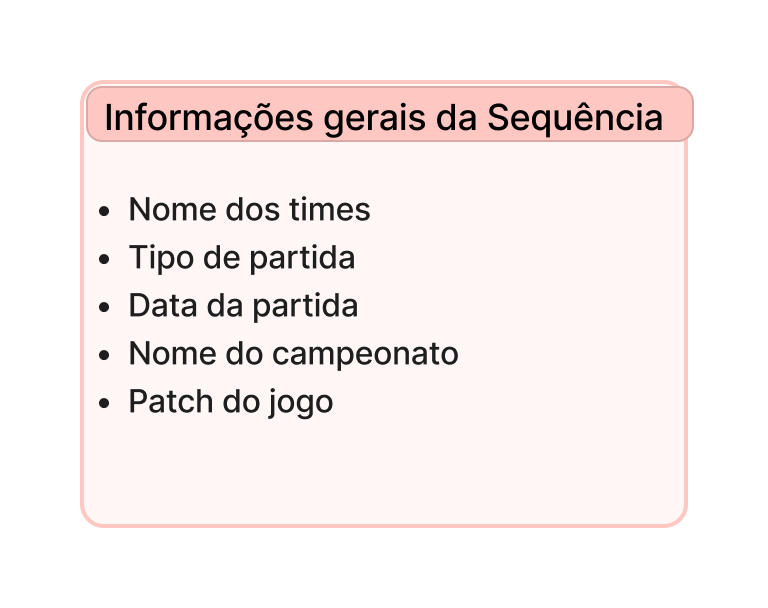

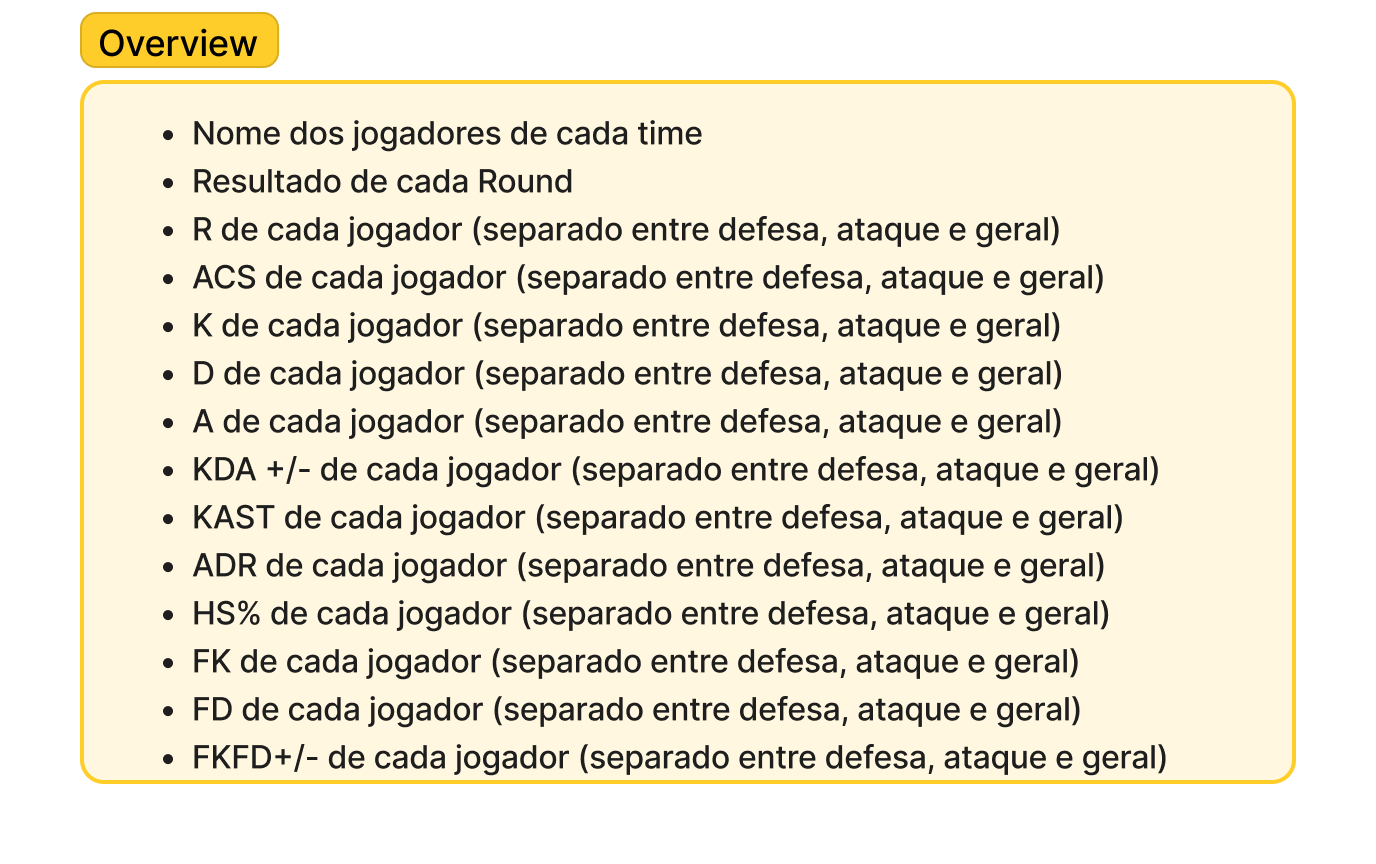

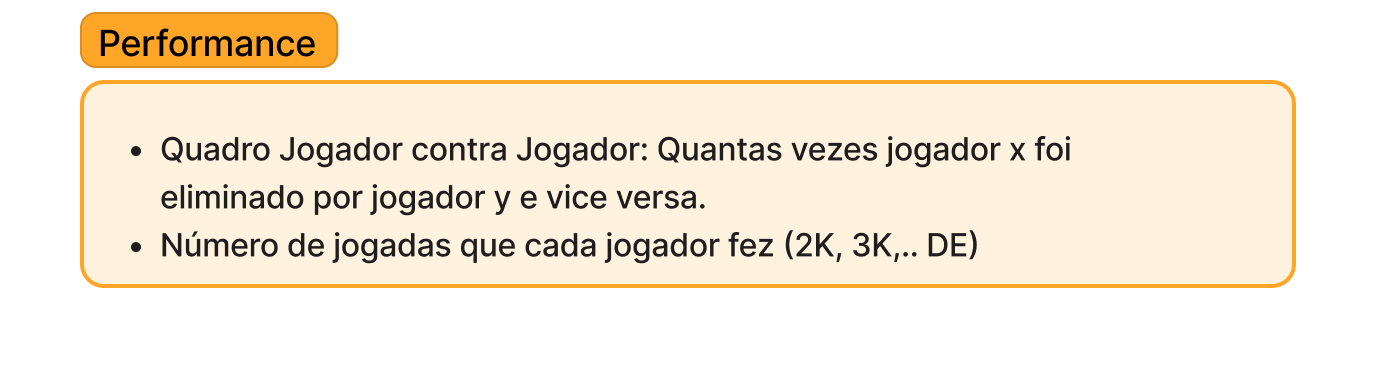

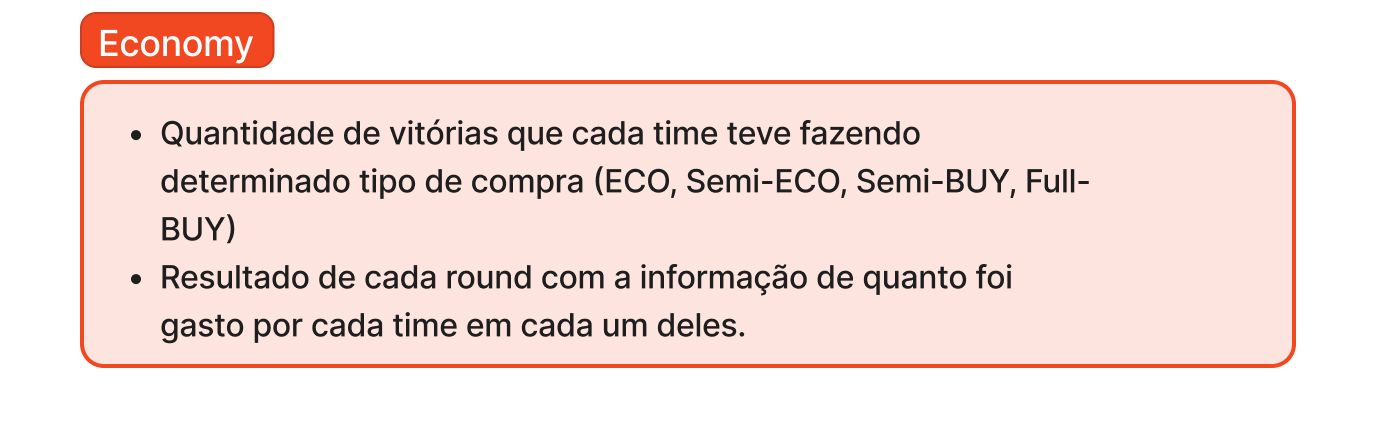

Uma sequência de partidas está organizada da seguinte forma

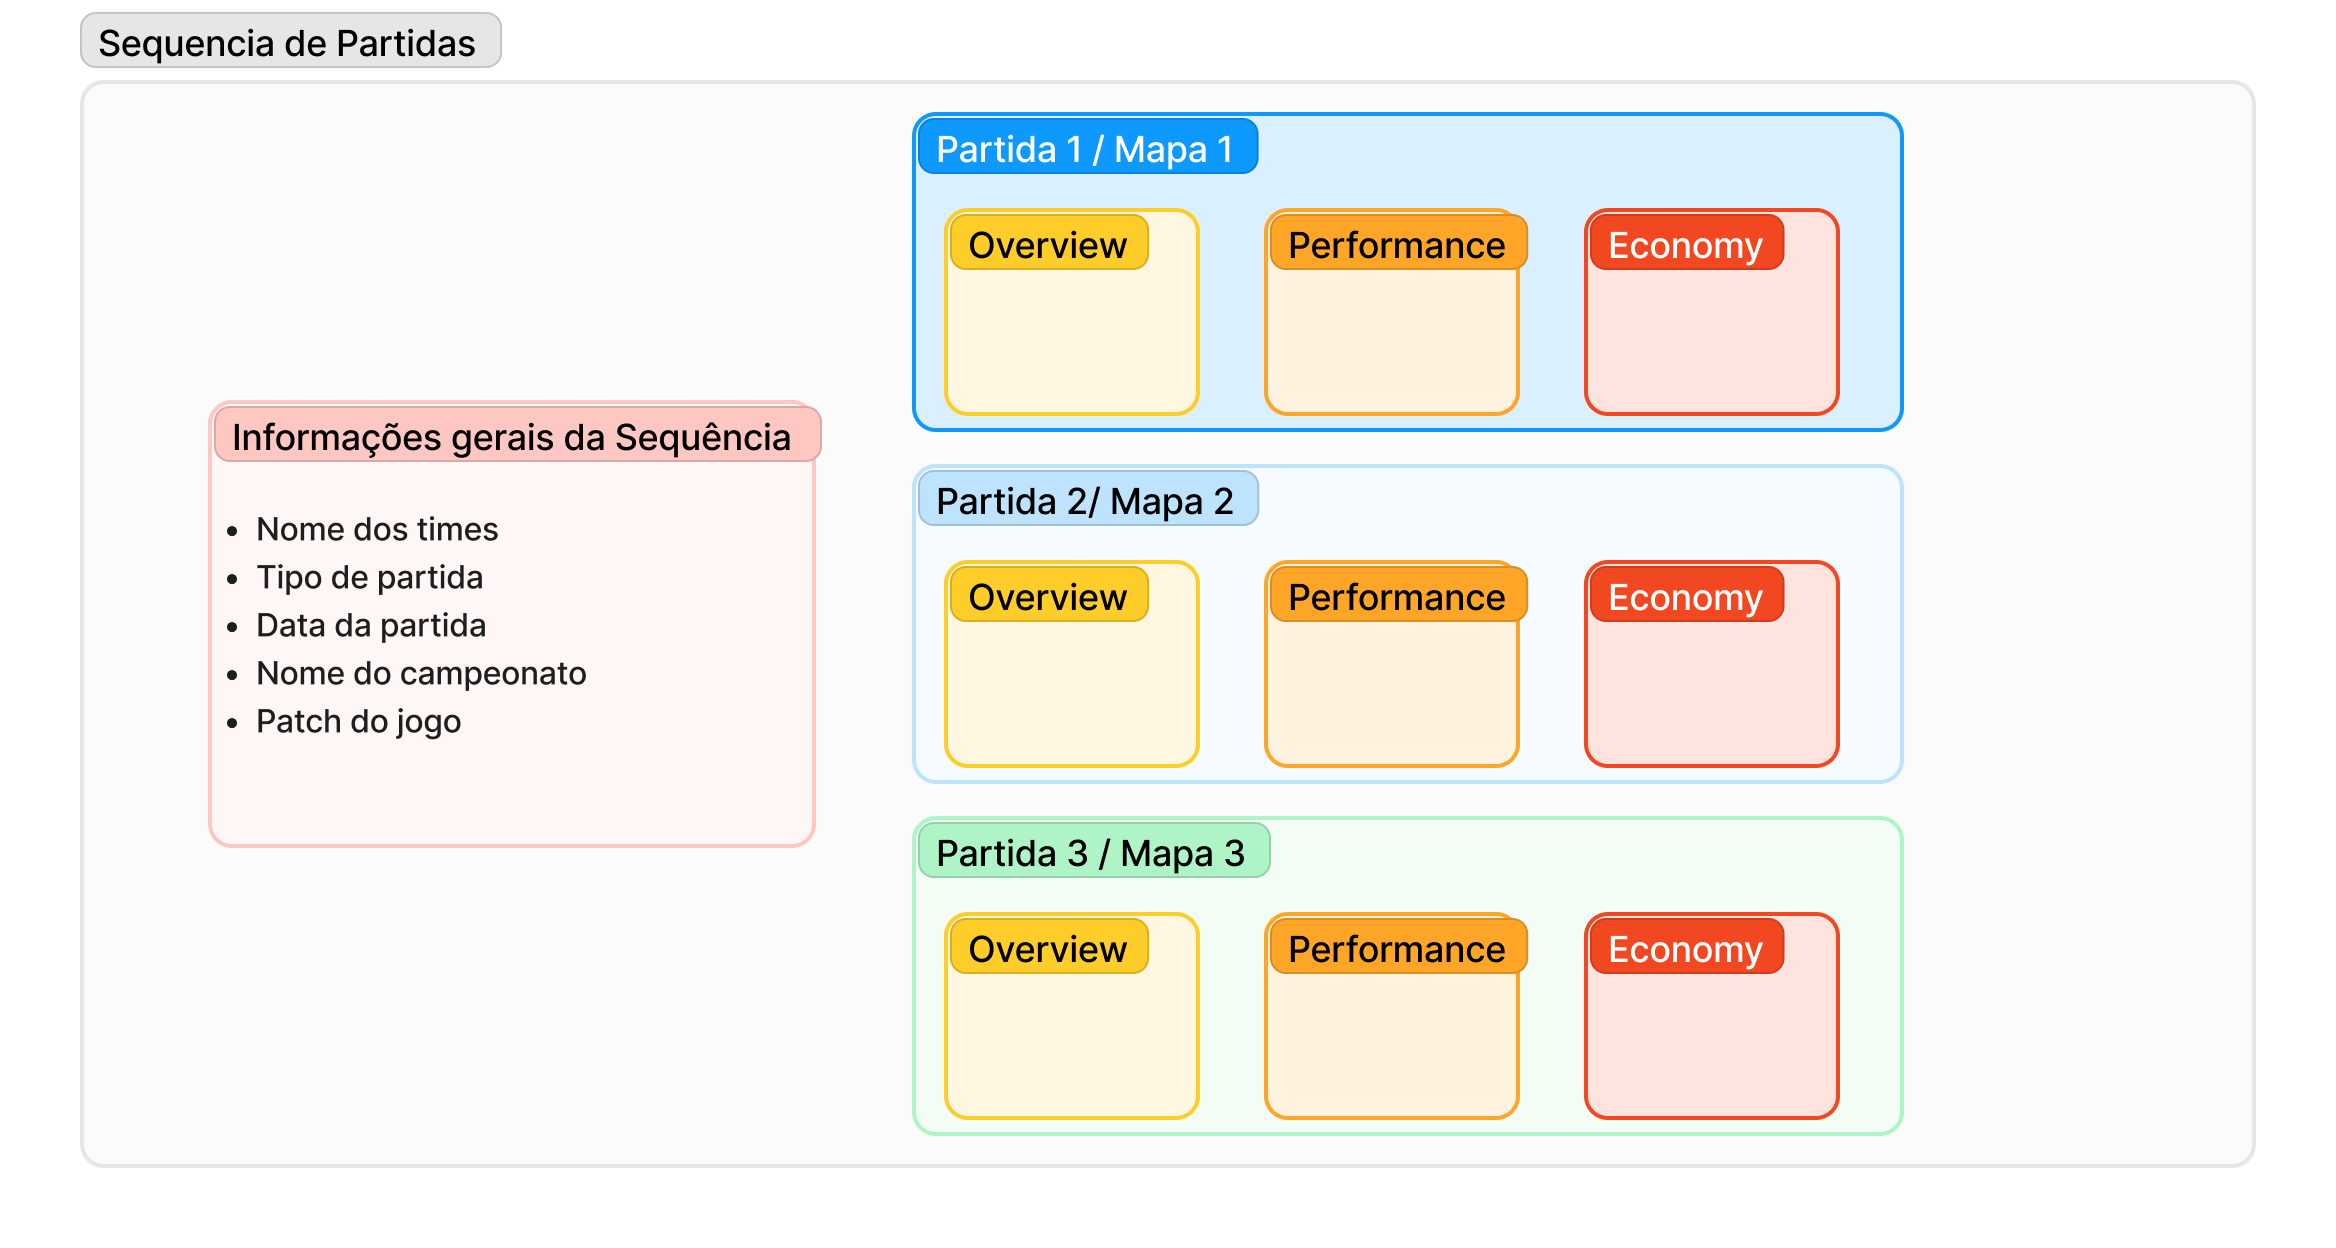

## Modelos

### Completude de Modelos para a tarefa de previsão de resultados de partidas

Com o passar dos anos, a relevância dos jogos eletrônicos tem aumentado cada vez mais como forma de entretenimento para todos os públicos. Pensando nisso, o grupo de autores Hodge, Devlin, Sephton, Block, Cowling e Drachen (2021) elaborou um estudo com o objetivo de prever o resultado de partidas de jogos competitivos em tempo real, algo que, segundo os próprios autores, era inexplorado. O estudo foi feito com base no jogo Dota 2, um dos jogos competitivos da categoria MOBA mais famosos atualmente.

Machine learning (ML), ou aprendizado de máquina, é uma área da ciência da computação focada no desenvolvimento de sistemas que melhoram seu desempenho com base em dados, sem serem explicitamente programados para isso. Muitos algoritmos de ML, incluindo a regressão logística, utilizam aprendizado supervisionado. Neste tipo de aprendizado, o algoritmo aprende a partir de exemplos rotulados, criando um modelo que associa características de entrada a categorias específicas, permitindo assim a previsão de resultados em novos dados não vistos. No contexto do Dota 2, isso significa mapear métricas do jogo para prever a equipe vencedora.

Os modelos de ML utilizados no estudo incluíram a regressão logística e o algoritmo Random Forest. Durante o torneio ESL One Hamburg 2017, a regressão logística mostrou uma acurácia de 85% após 5 minutos de jogo. Entre 5 e 20 minutos, a precisão do modelo variou entre 70% e 80%, enquanto entre 20 e 30 minutos, a precisão variou entre 80% e 90%. O Random Forest apresentou resultados semelhantes, com variações na precisão dentro dos mesmos intervalos de tempo.

Além destes, o estudo também considerou o uso do LightGBM, uma técnica de boosting de gradiente baseada em árvores de decisão. O LightGBM cria um conjunto de árvores e expande as árvores com base em uma abordagem folha a folha, o que pode ser mais eficaz do que a expansão nível a nível em termos de redução de perdas. No entanto, este método pode sofrer de sobreajuste, especialmente em conjuntos de dados menores, mas possui mecanismos para mitigar esse risco.

Os autores concluíram que a previsão de resultados em jogos competitivos é uma tarefa complexa e que nenhuma técnica isolada é consistentemente superior. Por isso, combinar diferentes métodos em um conjunto pode ser uma abordagem eficaz para melhorar a precisão das previsões. Portanto, além da regressão logística e do Random Forest, o estudo explorou o uso do LightGBM para testar a hipótese de que combinar dados de jogos profissionais com dados de jogadores habilidosos pode prever com precisão os vencedores das partidas profissionais.





### Regressão Logistica com base em informações In-Game

Neste artigo, foi utilizado um modelo de regressão logística chamado Modelo de Eficácia (EM) para prever os resultados das partidas nas Ligas Turcas de Voleibol Masculino e Feminino. As variáveis de entrada consideradas foram LE (Libero Efficiency), PE (Player Efficiency), OOE (Outside Hitter Efficiency), PCE (Player Center Efficiency) e N4E (Number 4 Efficiency). O resultado obtido foi a capacidade do modelo de explicar e prever os resultados das partidas com uma precisão de 83,45% na liga feminina e 78,23% na liga masculina.

Diferentes esportes podem servir como fontes de dados para estudos que abordam Inteligência Artificial. O estudo de Akarçeşme (2017) explora a eficácia de variáveis em um modelo de regressão logística para explicar os resultados com base nas posições dos jogadores em uma partida de vôlei. A variável dependente foi o resultado da partida, e a influência das eficiências dos jogadores em posições específicas, como líbero (LPE), levantador (SE), central (MBE), ponteiro (OHE) e jogador universal (UPE), foi investigada separadamente para ambos os gêneros. O modelo de eficácia classificou corretamente 83,45% das partidas vencidas e perdidas na TWVL (ligas turca de vôlei feminina), com uma sensibilidade de 85,03% e especificidade de 81,88%. Na análise da TMVL (ligas turca de vôlei masculinas), a precisão da classificação, sensibilidade e especificidade foram de 78,23%, 78,77% e 77,70%, respectivamente.

# **Implementação**


## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import ast
from collections import defaultdict
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


## Fonte dos dados

Colocamos o arquivo CSV resultante do nosso Webscrapping no github para conseguirmos montar o dataframe com o pandas. Como o arquivo é muito grande e excede o tamanho de 100mb do git, utilizamos a extensão Git LFS (Git Large File Storage).

O Git Large File Storage (LFS) irá gerenciar pessoalmente os arquivos individuais, isso acontece por meio de comandos no terminal, com isso, o Git LFS é capaz de identificar os arquivos classificados como “grandes” e substituí-los por ponteiros de texto dentro do Git, enquanto armazena o conteúdo do arquivo em um servidor remoto como GitHub.com ou GitHub Enterprise.

Dessa forma, utilizamos os seguintes comandos para configurar o repositório através do terminal:

- git lfs install (instalamos a extensão)
- git lfs track "*.csv" (pedimos para o lfs rastrear todos arquivos do tipo csv)
- git add .gitattributes (rastreamos o gitattributes ao commit)

Após isso, apenas realizamos o commit do arquivo e utilizamos o link do dataset raw do github, que pode ser encontrado em: https://media.githubusercontent.com/media/R0chaa/Valorant-AI/main/dados.csv

### Organização dos dados

Para realizar a captura dos dados foi criado um webscraping para obter as informações das sequências de partidas presentes no site vlr.gg

As informações de cada partida consistem em:

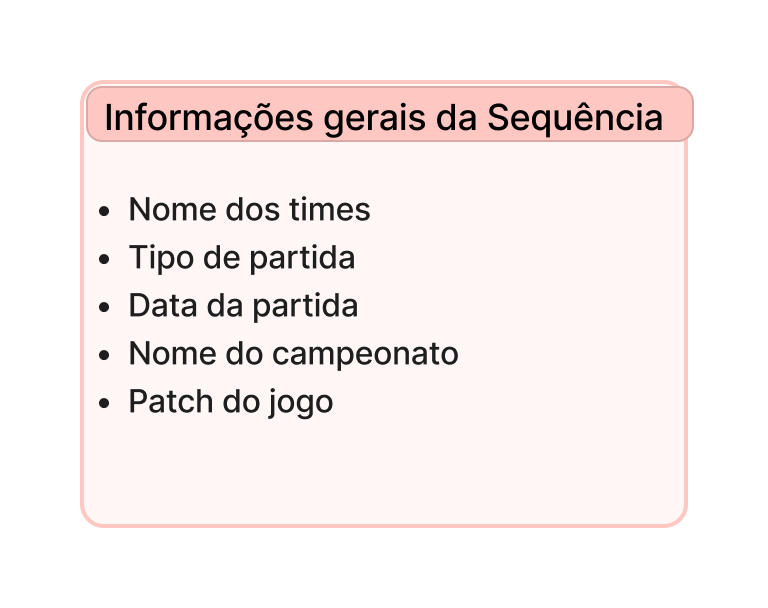

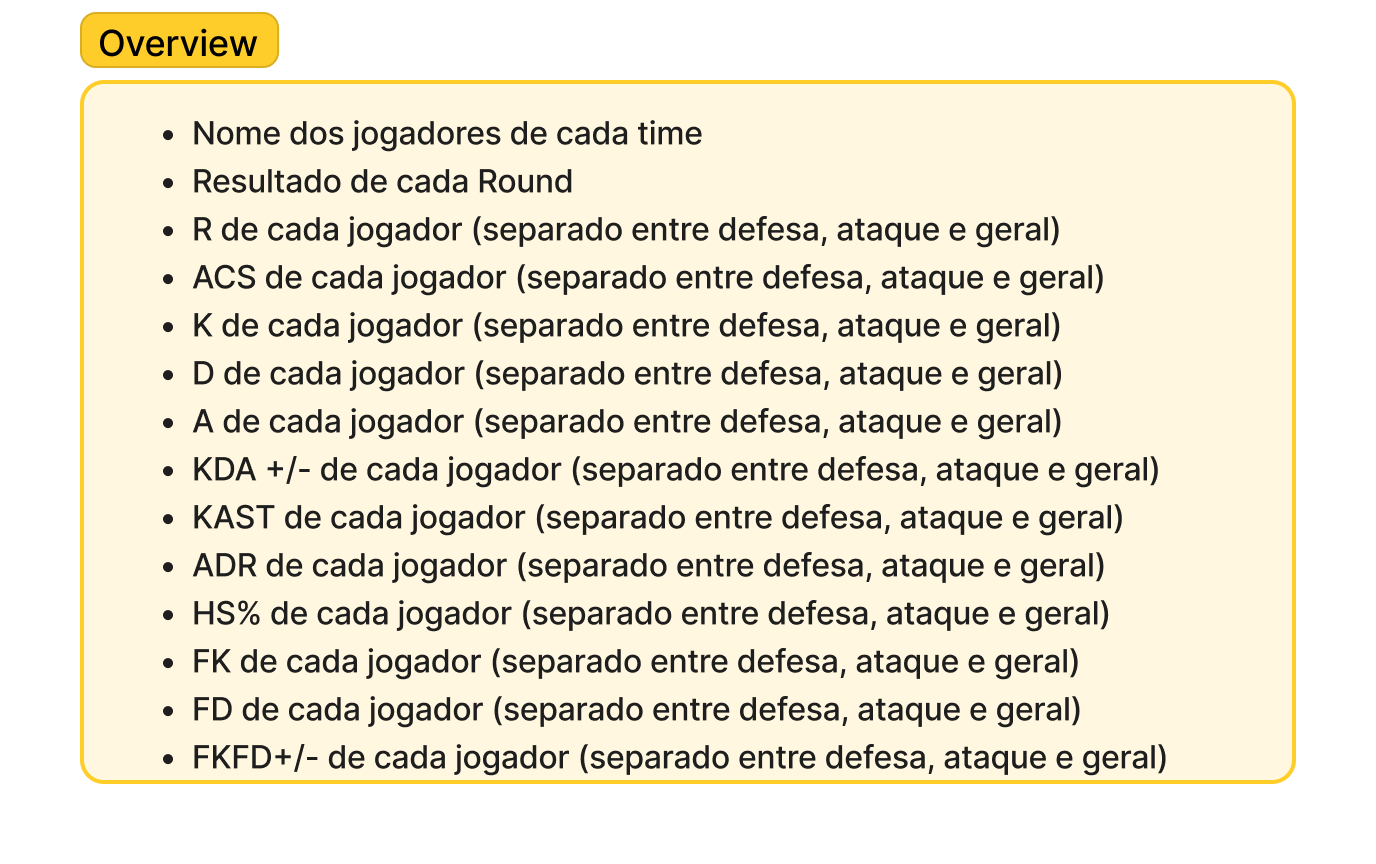

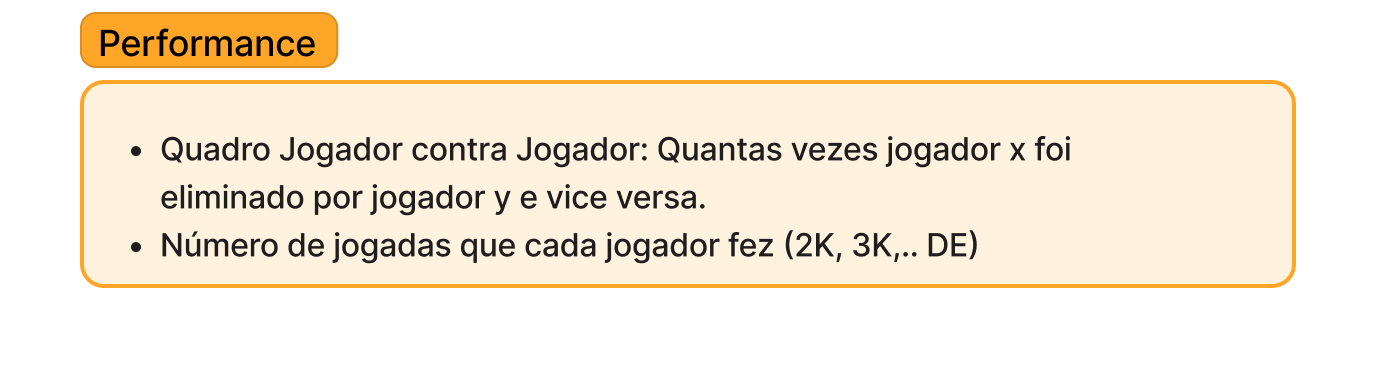

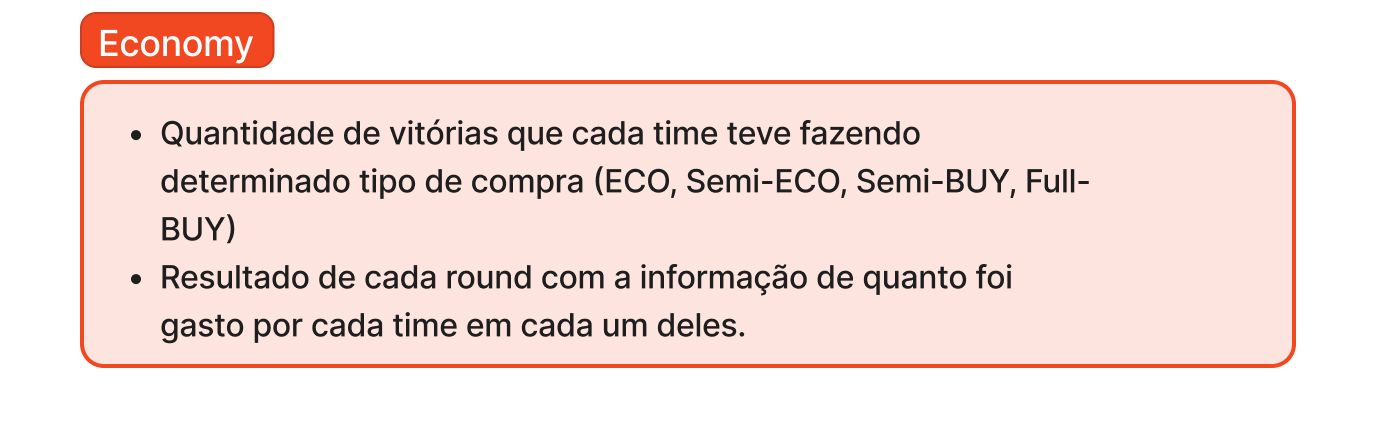

Uma sequência de partidas está organizada da seguinte forma

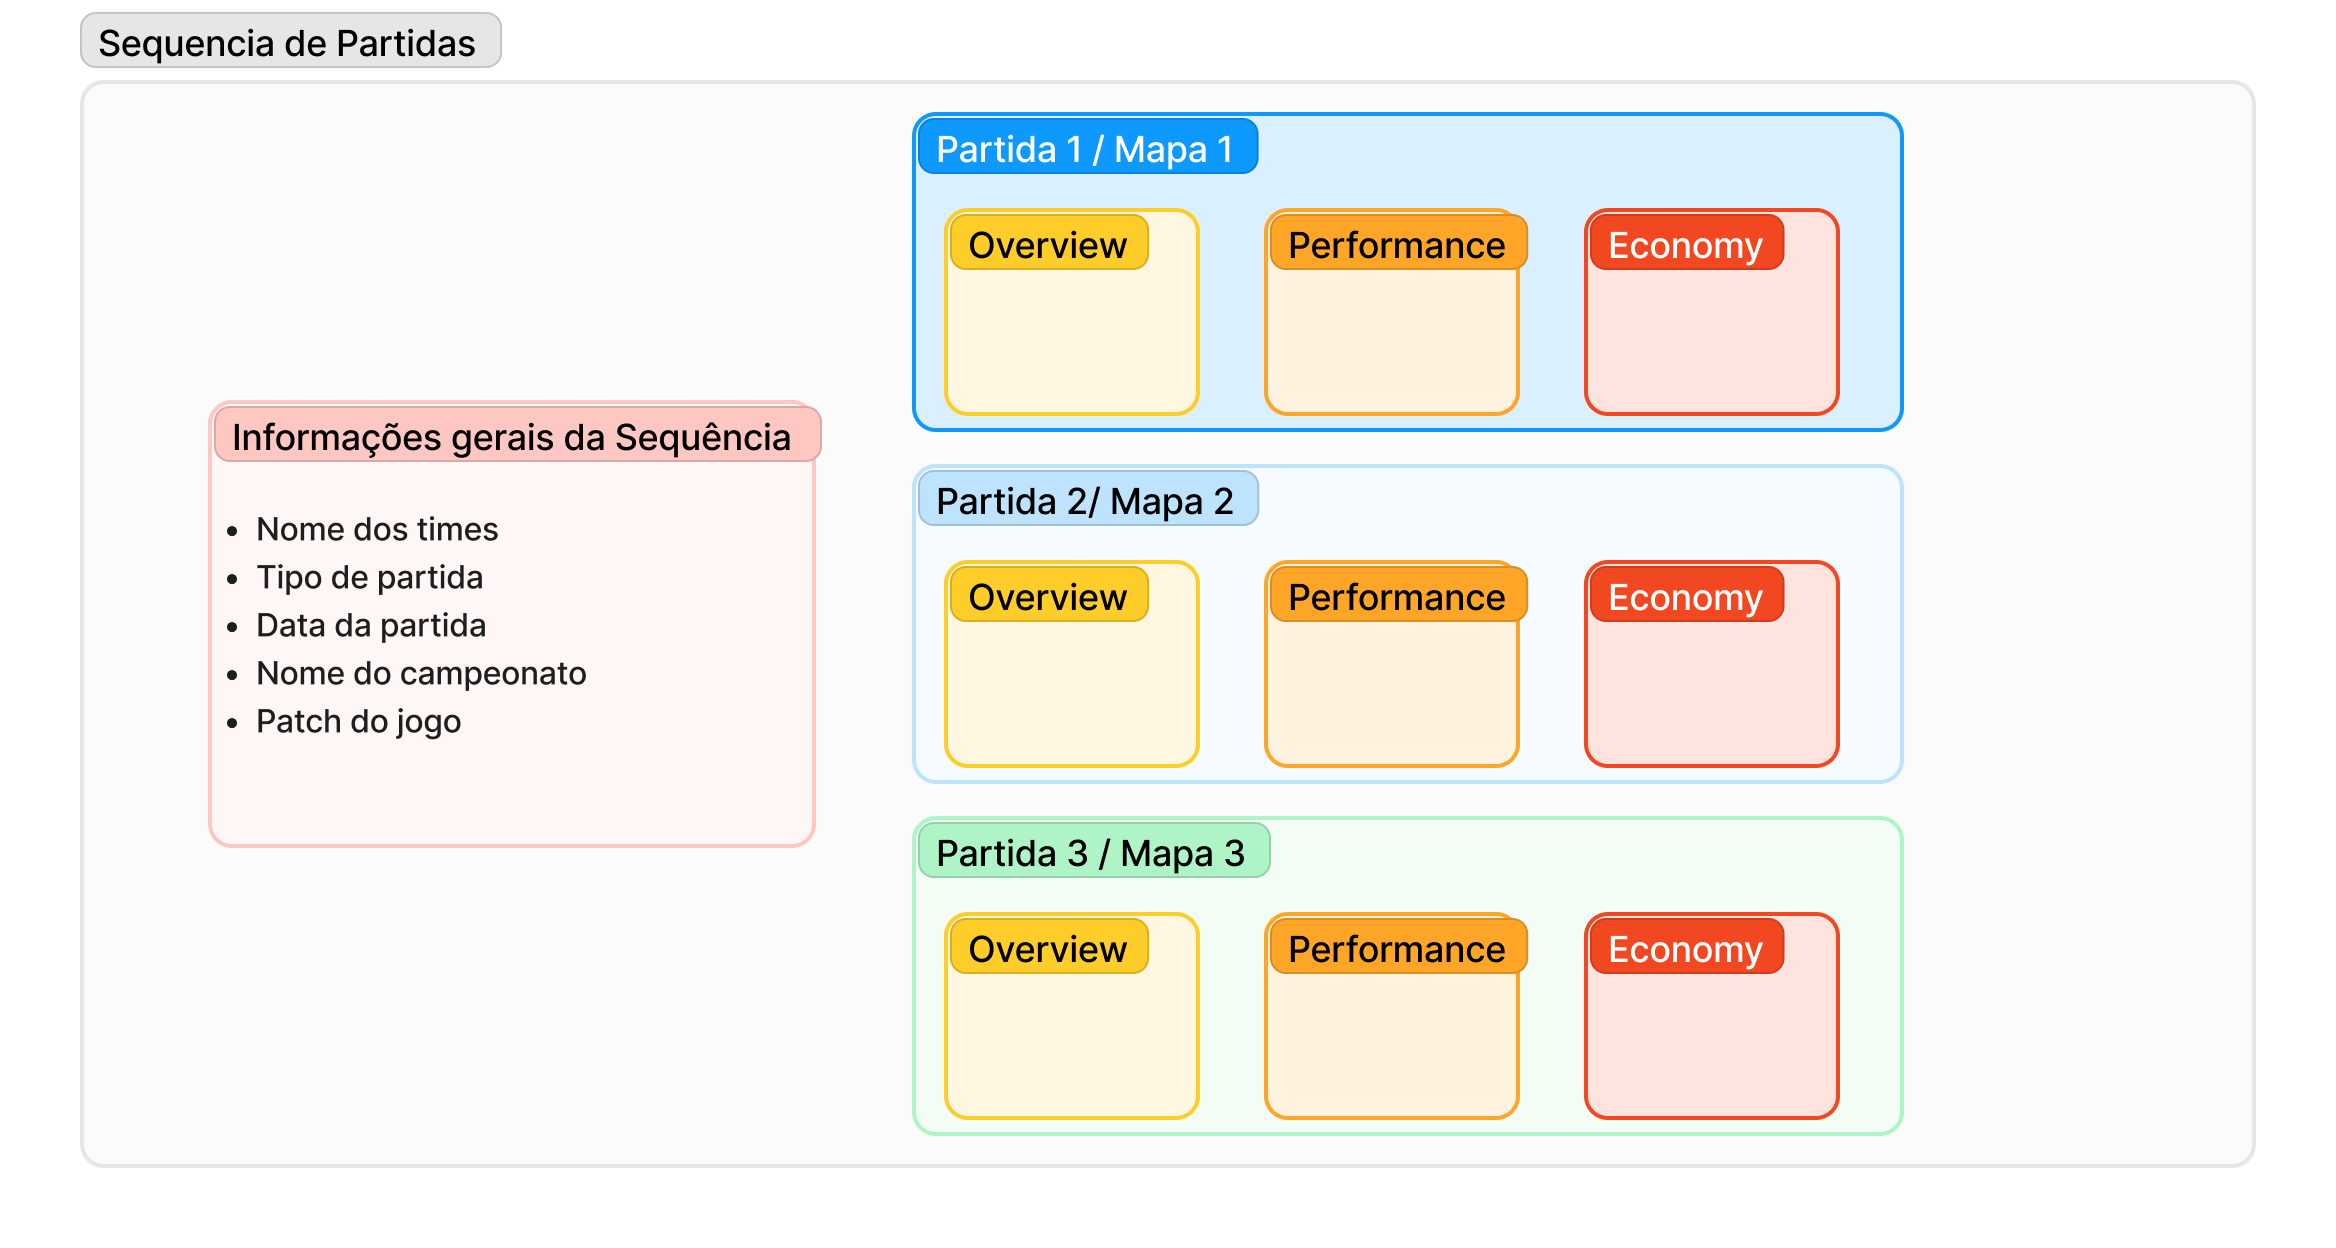

### Importando Dados

#### Montando Drive

#### Lendo CSV

In [ ]:
caminho_arquivo_csv = "https://media.githubusercontent.com/media/R0chaa/Valorant-AI/main/dados.csv"

#caso a leitura do dataframe completo pelo github retorne um erro, descomente as linhas abaixo e comente a linha 1 para consumir com o pandas uma versão reduzida do dataset

#url = "https://drive.google.com/file/d/1h4DRgBLyPHkwxfHVaJbn0b9jjRh6Ewhp/view?usp=sharing"
#caminho_arquivo_csv = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dados_csv = pd.read_csv(caminho_arquivo_csv)

## Explorando dados

### Informações básicas

#### Funções

In [ ]:
def analiseRapida(data):
  print(f"SIZE: {data.shape}")
  print(f"\nTYPES: {data.dtypes}")
  print(f"\nNULLS: {data.isnull().sum()}")
  print(f"\nDUPLICATED: {data.duplicated().sum()}")

def tamanhoPorTipoPartida(df):
  tipos = [1, 2, 3, 5]
  for tipo in tipos:
    print(f"Sequências do Tipo {tipo}: {df[df['tipo_partida'] == tipo].shape}")

#### Informações

In [ ]:
dados_csv.head()

,url,campeonato,date,patch,nomePrimeiroTime,nomeSegundoTime,tipo_partida,mapas,rounds,estatisticas,quadro_all_kills,quadro_jogadas,quadro_compras,quadro_tipo_compra_por_round
0,https://www.vlr.gg/178/simpleminecraftplayers-...,"['Absolute Masters', 'Group Stage: Group B']",2020-06-04 14:00:00,Patch 0.50Walking accuracy no longer granted w...,SimpleMinecraftPlayers,Absolute Legends,3,"['Bind', 'Split', 'Haven']","[[7, 5, 7, 7, 5, 7, 3, 5, 7, 2, 3, 7, 7, 6, 3,...","[[{'name': 'Vertigo Simp', 'agente': 'raze', '...",[],[],[],[]
1,https://www.vlr.gg/1004/team-turkey-vs-purple-...,"['CLUTCH BATTLES LAIR.GG', 'Tournament: Grand ...",2020-06-04 14:00:00,Patch 1.0,Team Turkey,Purple Cobras,3,"['Bind', 'Haven', 'Split']","[[], [], []]","[[{'name': 'Rip TU', 'agente': None, 'r': {'ge...",[],[],[],[]
2,https://www.vlr.gg/175/fordon-boars-vs-worst-p...,"['Absolute Masters', 'Group Stage: Group A']",2020-06-04 12:00:00,Patch 1.01Sage nerf - Barrier Orb cast range r...,Fordon Boars,Worst Players,3,"['Ascent', 'Split', 'Haven']","[[7, 7, 5, 7, 3, 3, 5, 2, 2, 3, 7, 3, 7, 3, 3,...","[[{'name': 'phr FB', 'agente': 'sova', 'r': {'...",[],[],[],[]
3,https://www.vlr.gg/603/startedfromcs-vs-blackb...,"['LeStream x BMW: The 2 Gran Coupé', 'Tourname...",2020-05-27 14:30:00,Patch 0.50Walking accuracy no longer granted w...,StartedFromCS,BlackBelts,3,"['Haven', 'Bind', 'N/A']","[[], [], []]","[[{'name': 'Ex6TenZ SFCS', 'agente': None, 'r'...",[],[],[],[]
4,https://www.vlr.gg/586/fabriken-vs-royals-valh...,"['Valhalla Invitational', 'Week 4: Grand Final']",2020-05-24 15:00:00,Patch 0.50Walking accuracy no longer granted w...,FABRIKEN,Royals,3,"['Bind', 'Split', 'N/A']","[[], [], []]","[[{'name': 'Leodeddz FABR', 'agente': 'sova', ...",[],[],[],[]


In [ ]:
analiseRapida(dados_csv)

SIZE: (21187, 14)

TYPES: url                             object
campeonato                      object
date                            object
patch                           object
nomePrimeiroTime                object
nomeSegundoTime                 object
tipo_partida                     int64
mapas                           object
rounds                          object
estatisticas                    object
quadro_all_kills                object
quadro_jogadas                  object
quadro_compras                  object
quadro_tipo_compra_por_round    object
dtype: object

NULLS: url                             0
campeonato                      0
date                            0
patch                           0
nomePrimeiroTime                0
nomeSegundoTime                 0
tipo_partida                    0
mapas                           0
rounds                          0
estatisticas                    0
quadro_all_kills                0
quadro_jogadas                  

In [ ]:
tamanhoPorTipoPartida(dados_csv)

Sequências do Tipo 1: (4039, 14)
Sequências do Tipo 2: (430, 14)
Sequências do Tipo 3: (15811, 14)
Sequências do Tipo 5: (907, 14)


### Transformando dados

Ao ler os dados do CSV, algumas estruturas não foram lidas nos tipos corretos e para arrumar isso será utilizada a biblioteca "ast" para realizar essa transformação das estruturas.

Nessa etapa os registros também foram ordenadas pela data e um erro do webscraping foi corrigido. Ao serem coletadas os nomes dos jogadores, o nome do time estava sendo concatenado no fim do nome do jogador. Dessa forma, buscamos pela aparição do último espaço e removemos a string depois dele.

In [ ]:
def trataEstruturas(estrutura):
  dicionario = ast.literal_eval(estrutura)
  return dicionario

def ordenaPelaData(df):
  df.sort_values(by='date', inplace=True)

def trataNomesNasEstatisticas(df):
  for i in df.index:
    for j in df.loc[i, 'estatisticas_tratadas']:
      for k in j:
          if k["name"]:
              ultimo_espaco = k["name"].rfind(' ')
              # Cortar o texto a partir do último espaço
              if ultimo_espaco != -1:
                k["name"] = k["name"][:ultimo_espaco]

In [ ]:
dados_csv['estatisticas_tratadas'] = dados_csv['estatisticas'].apply(trataEstruturas)
dados_csv['mapas_tratados'] = dados_csv['mapas'].apply(trataEstruturas)
dados_csv['rounds_tratados'] = dados_csv['rounds'].apply(trataEstruturas)
ordenaPelaData(dados_csv)
trataNomesNasEstatisticas(dados_csv)

In [ ]:
dados_csv.columns

Index(['url', 'campeonato', 'date', 'patch', 'nomePrimeiroTime',
       'nomeSegundoTime', 'tipo_partida', 'mapas', 'rounds', 'estatisticas',
       'quadro_all_kills', 'quadro_jogadas', 'quadro_compras',
       'quadro_tipo_compra_por_round', 'estatisticas_tratadas',
       'mapas_tratados', 'rounds_tratados'],
      dtype='object')

### Criando Dataset separando as partidas de cada Sequência

#### Explicando nova organização

Por termos todas as partidas juntas dentro de uma sequencia, decidimos separar cada partida para ser um registro diferente. Dessa forma, os dados irão assumir a seguinte organização:

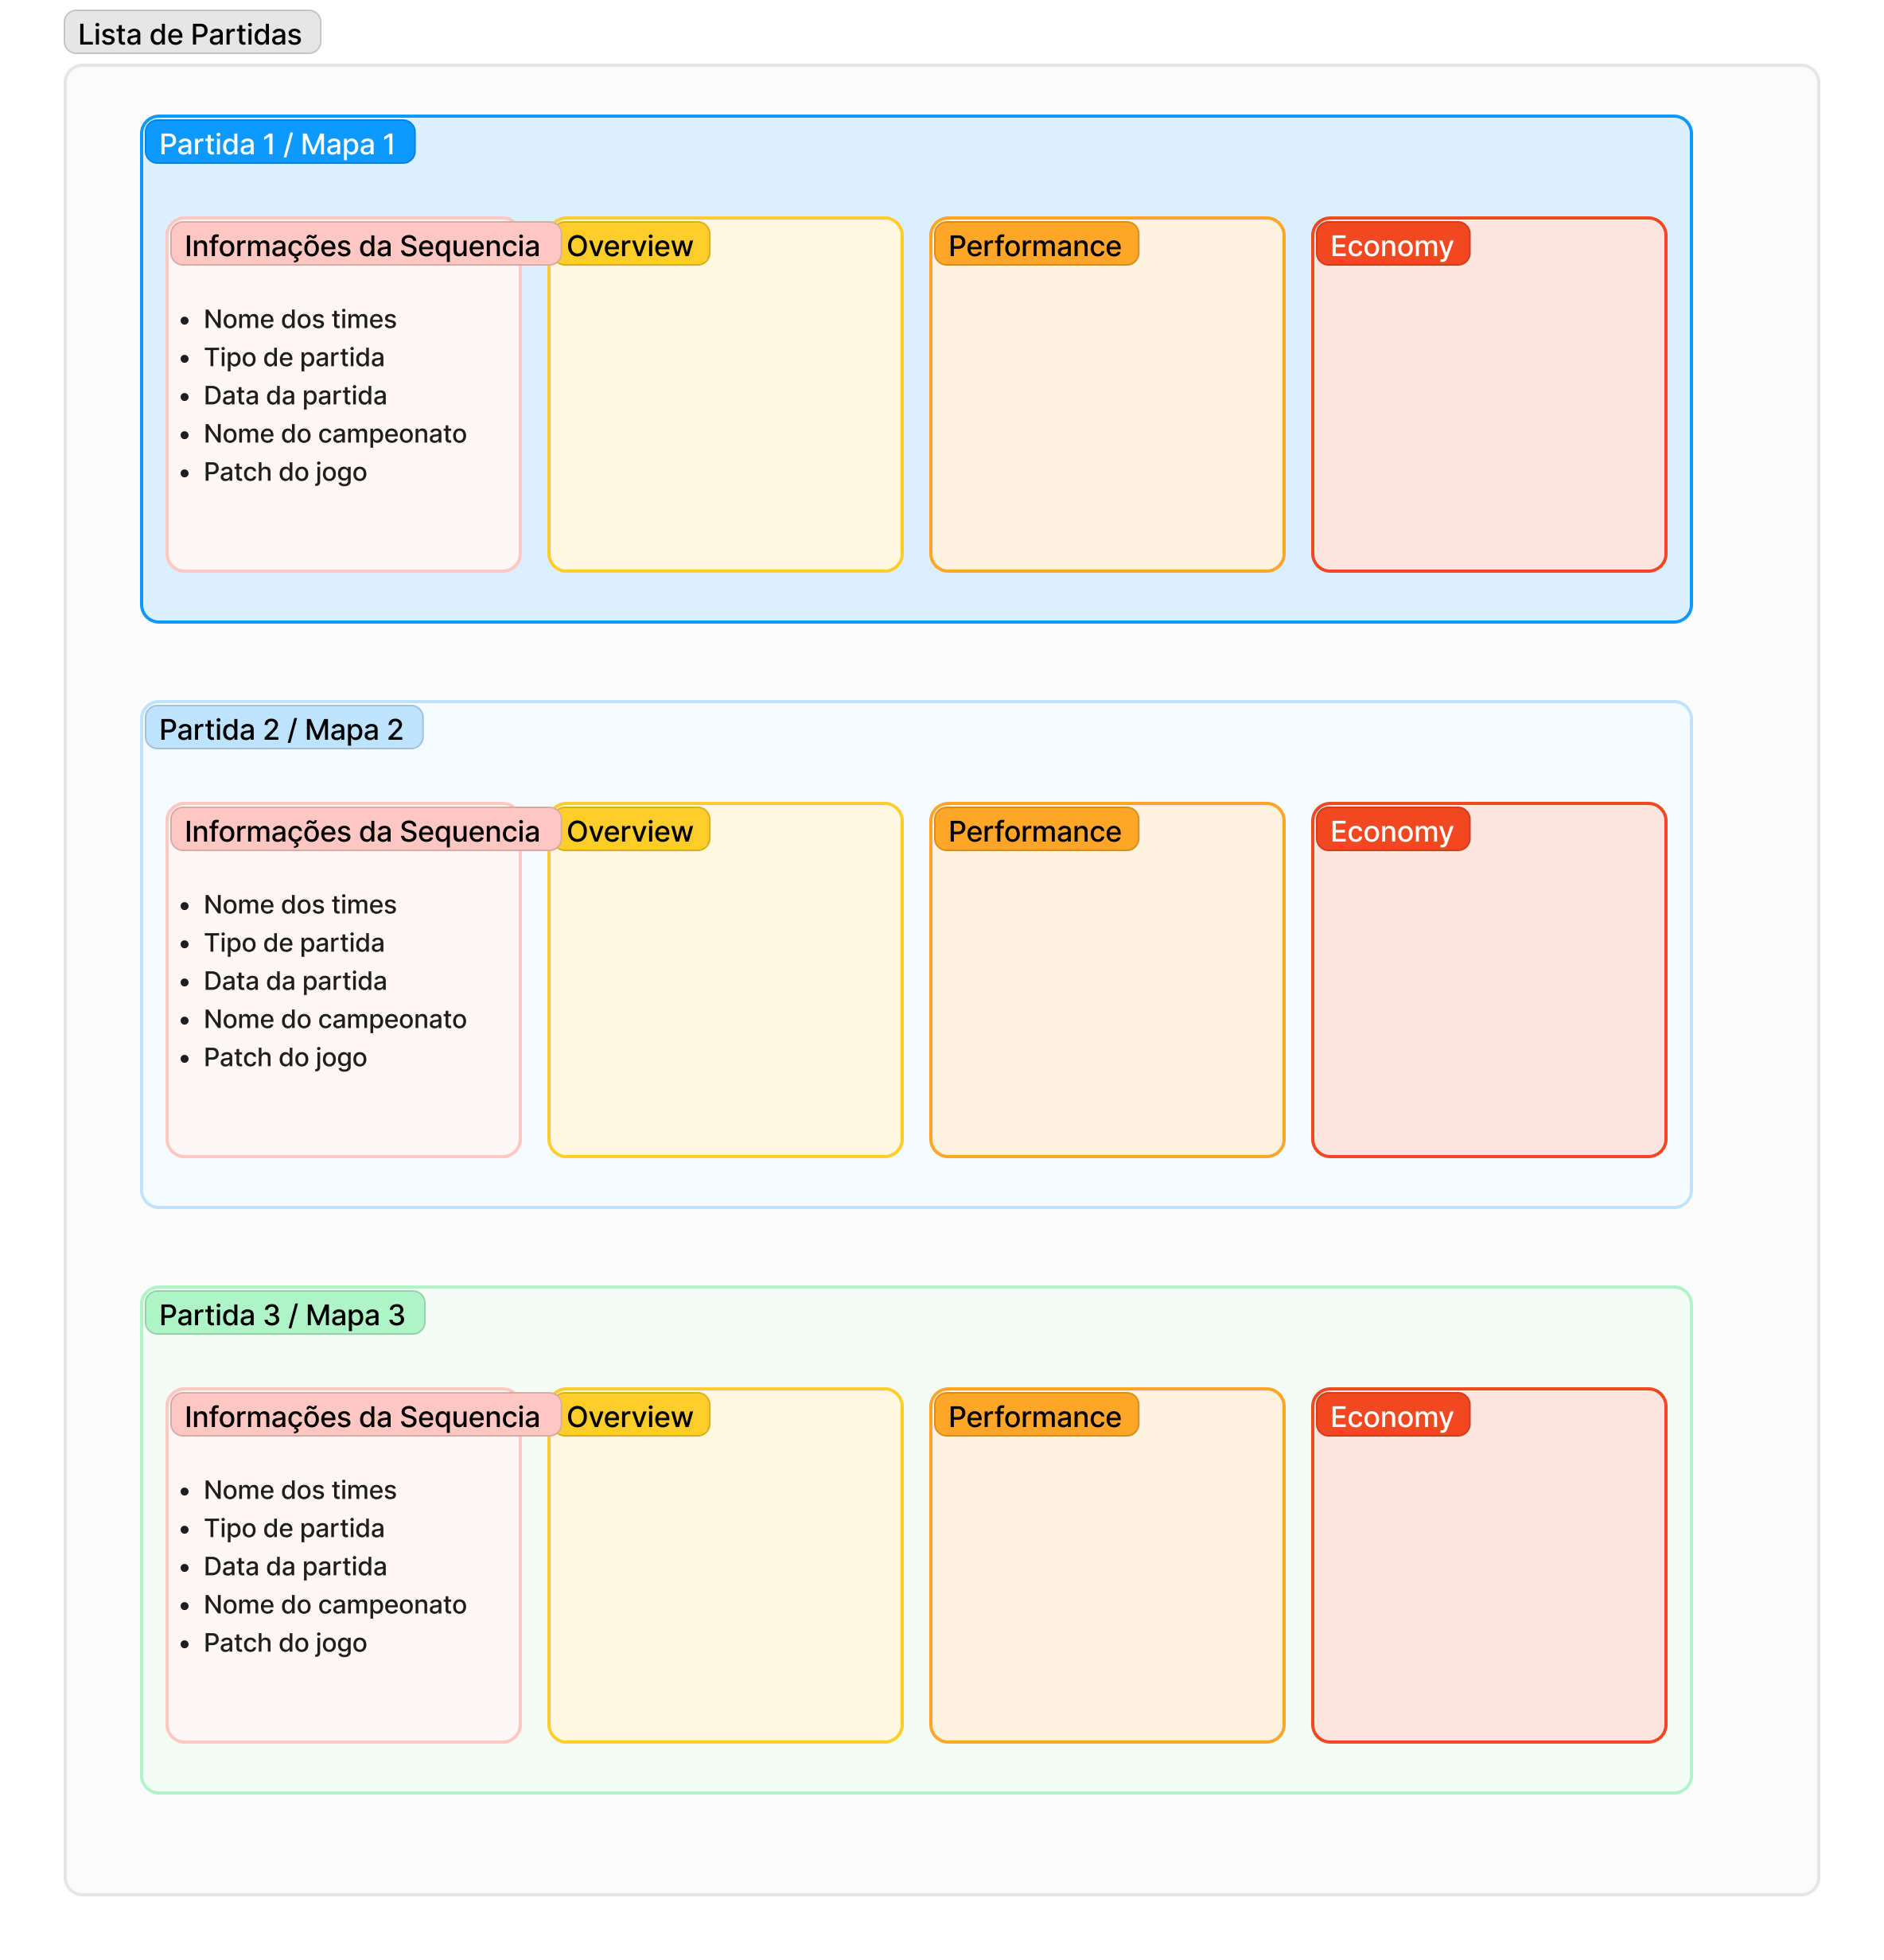

Durante esse processo, foram obtidos tres erros: referente a sequencias classificadas com o tipo errado pelo site:



* https://www.vlr.gg/124758/b4-angels-vs-gamelanders-purple-gamers-club-elite-cup-immortal-r3
* https://www.vlr.gg/124732/team-liquid-brazil-vs-oddik-bright-gamers-club-elite-cup-immortal-r3
* https://www.vlr.gg/163068/refre5h-vs-rpg-challengers-league-portugal-split-1-5th-place




#### Código

In [ ]:
import pandas as pd

def valida(lista):
    if not lista:
        return False
    for jogador in lista:
        for value in jogador.values():
            if value in ("", None):
                return False
    return True

def datasetSeparadoPorPartidas(df):
    novo_dataframe_lista = []
    for _, row in df.iterrows():
        url = row["url"]
        campeonato = row["campeonato"]
        date = row["date"]
        patch = row["patch"]
        nomePrimeiroTime = row["nomePrimeiroTime"]
        nomeSegundoTime = row["nomeSegundoTime"]
        tipo_partida = row["tipo_partida"]
        estatisticas_tratadas = row["estatisticas_tratadas"]
        mapas_tratados = row["mapas_tratados"]
        rounds_tratados = row["rounds_tratados"]

        try:
            for j in range(0, len(estatisticas_tratadas), 2):
                timeUm = estatisticas_tratadas[j]
                timeDois = estatisticas_tratadas[j + 1]
                if valida(timeUm) and valida(timeDois):
                    dados_partida = {
                        "url": url, "campeonato": campeonato,
                        "data": date, "patch": patch,
                        "nome_primeiro_time": nomePrimeiroTime, "nome_segundo_time": nomeSegundoTime,
                        "tipo_partida": tipo_partida,
                        "mapa": mapas_tratados[j // 2], "rounds_tratados": rounds_tratados[j // 2],
                        "timeUm": timeUm, "timeDois": timeDois
                    }
                    novo_dataframe_lista.append(dados_partida)
        except Exception as e:
            print(url)
    return pd.DataFrame(novo_dataframe_lista)


In [ ]:
dados_csv_separados_partida = datasetSeparadoPorPartidas(dados_csv)

https://www.vlr.gg/124732/team-liquid-brazil-vs-oddik-bright-gamers-club-elite-cup-immortal-r3
https://www.vlr.gg/124758/b4-angels-vs-gamelanders-purple-gamers-club-elite-cup-immortal-r3
https://www.vlr.gg/163068/refre5h-vs-rpg-challengers-league-portugal-split-1-5th-place


In [ ]:
dados_csv_separados_partida.shape

(45015, 11)

In [ ]:
#dados_csv_separados_partida.head()

In [ ]:
del dados_csv

In [ ]:
dados_csv_separados_partida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45015 entries, 0 to 45014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 45015 non-null  object
 1   campeonato          45015 non-null  object
 2   data                45015 non-null  object
 3   patch               45015 non-null  object
 4   nome_primeiro_time  45015 non-null  object
 5   nome_segundo_time   45015 non-null  object
 6   tipo_partida        45015 non-null  int64 
 7   mapa                45015 non-null  object
 8   rounds_tratados     45015 non-null  object
 9   timeUm              45015 non-null  object
 10  timeDois            45015 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.8+ MB


### Criando Label Vencedor para cada partida

Apesar do site disponibilizar o placar final da sequência de partida não é possível descobrir só por ele qual time foi o vencedor em cada mapa. Dessa maneira, iremos iterar sobre a lista de rounds de cada partida e calcular o vencedor.
Durante o webscraping foi realizado uma numeração os possíveis resultados de cadas round:

* EQUIPE1DESARMA = 1
* EQUIPE1DETONA = 2
* EQUIPE1ELIMINA = 3
* EQUIPE1TEMPO = 4
* EQUIPE2DESARMA = 5
* EQUIPE2DETONA = 6
* EQUIPE2ELIMINA = 7
* EQUIPE2TEMPO = 8

Os numeros 1 a 4 representam um resultado favoravel ao time 1 e os numeros 5 a 8 representam um resultado favorável ao time 2

In [ ]:
def criaLabelVencedor(dataframe):
    vencedores = []
    for index, row in dataframe.iterrows():
        timeUm = 0
        timeDois = 0
        for round in row['rounds_tratados']:
            if round <= 4:
                timeUm += 1
            else:
                timeDois += 1
        if timeUm > timeDois:
            vencedores.append("TIME 1")
        else:
            vencedores.append("TIME 2")

    dataframe['vencedor'] = vencedores
    return dataframe

In [ ]:
dados_csv_separados_partida_com_label = criaLabelVencedor(dados_csv_separados_partida)

In [ ]:
dados_csv_separados_partida_com_label.size

540180

In [ ]:
del dados_csv_separados_partida

### Separando informações de ataque do TIME 1 e informações de defesa do TIME 2

#### Relembrando proposta do projeto

O objetivo desse projeto é aplicar um modelo para prever qual será o time vencedor de uma mapa a partir da informações disponíveis durante a troca de lados, ou seja, quando o Time 1, que estava atacando, passa a realizar a tarefa de defesa e o Time 2 também realiza essa troca.

O acesso à essas inforamções está disponível nas próprias informações trazidas pelo websacrping, uma vez que podemos separar a performace de cada um dos times pela chave ataque e defesa existentes em todos os atributos do bloco Overview.

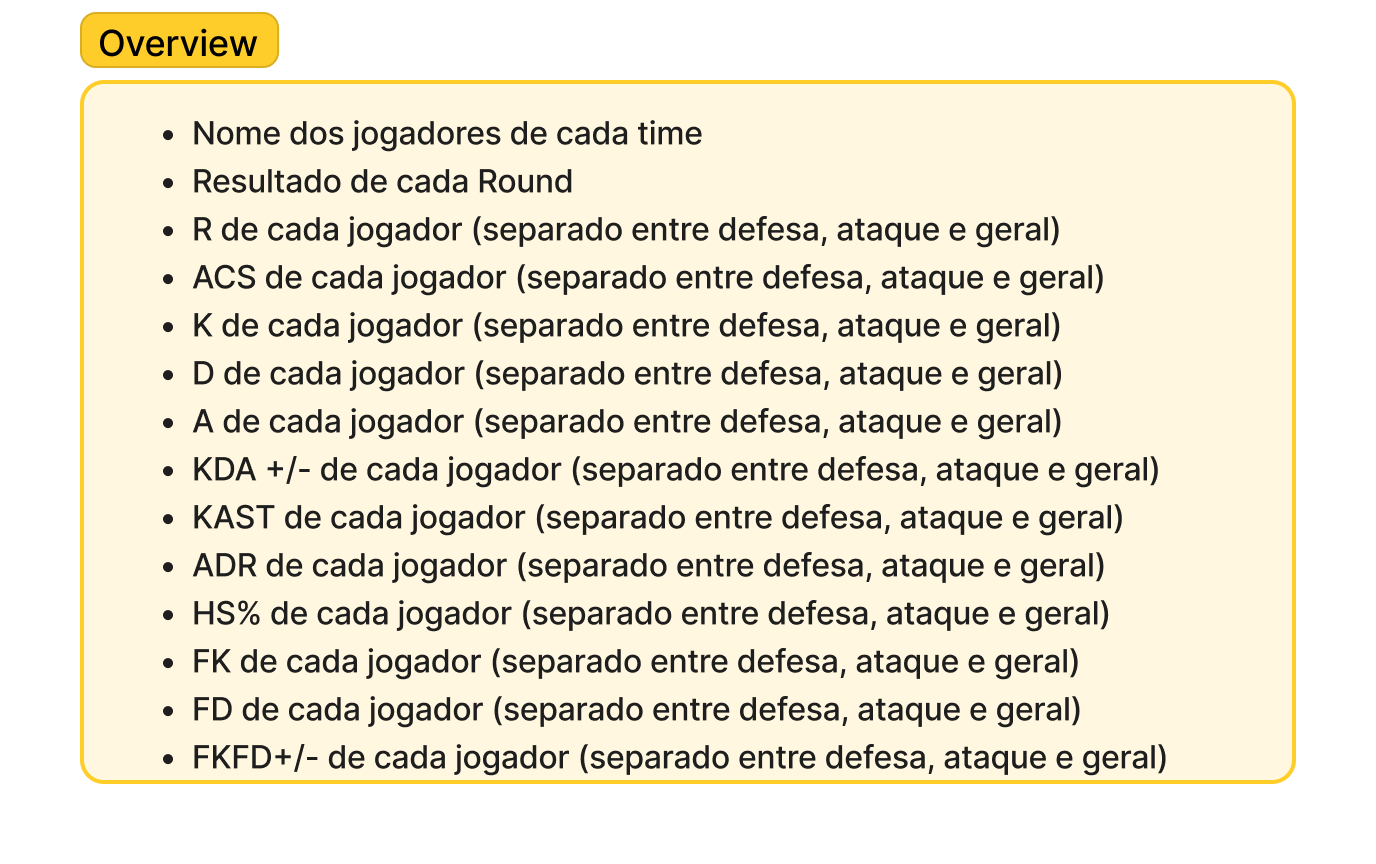

#### Código

In [ ]:
import copy

def capturaAtaqueDefesa(dataframe):
    timeUmAtaqueList = []
    timeDoisDefesaList = []

    for index, row in dataframe.iterrows():
        timeUmAtaque = []
        timeDoisDefesa = []

        for hashmap in row['timeUm']:
            copia_hashmap = copy.deepcopy(hashmap)
            for key in copia_hashmap:
                valor = copia_hashmap[key]
                if isinstance(valor, dict) and 'ataque' in valor:
                    copia_hashmap[key] = valor['ataque']
            timeUmAtaque.append(copia_hashmap)

        for hashmap in row['timeDois']:
            copia_hashmap = copy.deepcopy(hashmap)
            for key in copia_hashmap:
                valor = copia_hashmap[key]
                if isinstance(valor, dict) and 'defesa' in valor:
                    copia_hashmap[key] = valor['defesa']
            timeDoisDefesa.append(copia_hashmap)

        timeUmAtaqueList.append(timeUmAtaque)
        timeDoisDefesaList.append(timeDoisDefesa)

    dataframe['timeUmAtaque'] = timeUmAtaqueList
    dataframe['timeDoisDefesa'] = timeDoisDefesaList

In [ ]:
capturaAtaqueDefesa(dados_csv_separados_partida_com_label)

In [ ]:
dados_csv_separados_partida_com_label.head()

,url,campeonato,data,patch,nome_primeiro_time,nome_segundo_time,tipo_partida,mapa,rounds_tratados,timeUm,timeDois,vencedor,timeUmAtaque,timeDoisDefesa
0,https://www.vlr.gg/159/fordon-boars-vs-clan123...,"['Absolute Masters', 'Group Stage: Group A']",2020-05-14 12:00:00,Patch 0.50Walking accuracy no longer granted w...,Fordon Boars,Clan123,3,Haven,[],"[{'name': 'paTiTek', 'agente': 'phoenix', 'r':...","[{'name': 'Boombl4', 'agente': 'jett', 'r': {'...",TIME 2,"[{'name': 'paTiTek', 'agente': 'phoenix', 'r':...","[{'name': 'Boombl4', 'agente': 'jett', 'r': No..."
1,https://www.vlr.gg/159/fordon-boars-vs-clan123...,"['Absolute Masters', 'Group Stage: Group A']",2020-05-14 12:00:00,Patch 0.50Walking accuracy no longer granted w...,Fordon Boars,Clan123,3,Bind,[],"[{'name': 'Neex', 'agente': 'raze', 'r': {'ger...","[{'name': 'Boombl4', 'agente': 'jett', 'r': {'...",TIME 2,"[{'name': 'Neex', 'agente': 'raze', 'r': None,...","[{'name': 'Boombl4', 'agente': 'jett', 'r': No..."
2,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Haven,[],"[{'name': 'CzMarvVIK', 'agente': 'phoenix', 'r...","[{'name': 'Vertigo', 'agente': 'raze', 'r': {'...",TIME 2,"[{'name': 'CzMarvVIK', 'agente': 'phoenix', 'r...","[{'name': 'Vertigo', 'agente': 'raze', 'r': No..."
3,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Split,[],"[{'name': 'BoViii', 'agente': 'raze', 'r': {'g...","[{'name': 'envi', 'agente': 'cypher', 'r': {'g...",TIME 2,"[{'name': 'BoViii', 'agente': 'raze', 'r': Non...","[{'name': 'envi', 'agente': 'cypher', 'r': Non..."
4,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Bind,[],"[{'name': 'BoViii', 'agente': 'raze', 'r': {'g...","[{'name': 'Vertigo', 'agente': 'raze', 'r': {'...",TIME 2,"[{'name': 'BoViii', 'agente': 'raze', 'r': Non...","[{'name': 'Vertigo', 'agente': 'raze', 'r': No..."


### Tranformando estatísticas em colunas

Já temos as informações que queremos usar para treinar o modelo, mas elas estão dentro de um hashmap. Para resolver isso teremos que criar colunas para cada atributo a ser utilizado, seguindo o padrão {nome do atributo}\_{numero_do_jogador_no_time}_{TIME}

**Em um primeiro teste, será feito esse processo apenas para o valor R das estatísticas**

In [ ]:
import pandas as pd
from tqdm import tqdm

def criaColunasParaAtributos(dataframe):
    listaAtributos = ["r"]  # Lista de atributos que queremos transformar em colunas

    # Calcula o tamanho máximo das listas timeUmAtaque e timeDoisDefesa
    max_timeUm = max(len(row['timeUmAtaque']) for _, row in dataframe.iterrows())
    max_timeDois = max(len(row['timeDoisDefesa']) for _, row in dataframe.iterrows())

    # Inicializa dicionários para armazenar os valores dos atributos
    colunas = {f"timeUm_{atributo}_{i}": [] for atributo in listaAtributos for i in range(max_timeUm)}
    colunas.update({f"timeDois_{atributo}_{i}": [] for atributo in listaAtributos for i in range(max_timeDois)})

    for index, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0], desc="Processando linhas"):
        # Extrai os valores dos atributos para timeUmAtaque
        for i in range(max_timeUm):
            for atributo in listaAtributos:
                coluna_nome = f"timeUm_{atributo}_{i}"
                if i < len(row['timeUmAtaque']):
                    valor = row['timeUmAtaque'][i].get(atributo, None)
                    colunas[coluna_nome].append(float(valor) if valor is not None else None)
                else:
                    colunas[coluna_nome].append(None)

        # Extrai os valores dos atributos para timeDoisDefesa
        for i in range(max_timeDois):
            for atributo in listaAtributos:
                coluna_nome = f"timeDois_{atributo}_{i}"
                if i < len(row['timeDoisDefesa']):
                    valor = row['timeDoisDefesa'][i].get(atributo, None)
                    colunas[coluna_nome].append(float(valor) if valor is not None else None)
                else:
                    colunas[coluna_nome].append(None)

    # Adiciona as novas colunas ao DataFrame
    for coluna, valores in colunas.items():
        dataframe[coluna] = valores

    return dataframe


In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas = criaColunasParaAtributos(dados_csv_separados_partida_com_label)

Processando linhas: 100%|██████████| 45015/45015 [00:07<00:00, 6280.21it/s]


In [ ]:
del dados_csv_separados_partida_com_label

## Resultado Do Tratamento dos dados

In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas.shape

(45015, 24)

In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas.head()

,url,campeonato,data,patch,nome_primeiro_time,nome_segundo_time,tipo_partida,mapa,rounds_tratados,timeUm,...,timeUm_r_0,timeUm_r_1,timeUm_r_2,timeUm_r_3,timeUm_r_4,timeDois_r_0,timeDois_r_1,timeDois_r_2,timeDois_r_3,timeDois_r_4
0,https://www.vlr.gg/159/fordon-boars-vs-clan123...,"['Absolute Masters', 'Group Stage: Group A']",2020-05-14 12:00:00,Patch 0.50Walking accuracy no longer granted w...,Fordon Boars,Clan123,3,Haven,[],"[{'name': 'paTiTek', 'agente': 'phoenix', 'r':...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.vlr.gg/159/fordon-boars-vs-clan123...,"['Absolute Masters', 'Group Stage: Group A']",2020-05-14 12:00:00,Patch 0.50Walking accuracy no longer granted w...,Fordon Boars,Clan123,3,Bind,[],"[{'name': 'Neex', 'agente': 'raze', 'r': {'ger...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Haven,[],"[{'name': 'CzMarvVIK', 'agente': 'phoenix', 'r...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Split,[],"[{'name': 'BoViii', 'agente': 'raze', 'r': {'g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.vlr.gg/161/vik-vs-simpleminecraftp...,"['Absolute Masters', 'Group Stage: Group B']",2020-05-14 13:30:00,Patch 0.50Walking accuracy no longer granted w...,Vikingekrig Esports,SimpleMinecraftPlayers,3,Bind,[],"[{'name': 'BoViii', 'agente': 'raze', 'r': {'g...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas.columns

Index(['url', 'campeonato', 'data', 'patch', 'nome_primeiro_time',
       'nome_segundo_time', 'tipo_partida', 'mapa', 'rounds_tratados',
       'timeUm', 'timeDois', 'vencedor', 'timeUmAtaque', 'timeDoisDefesa',
       'timeUm_r_0', 'timeUm_r_1', 'timeUm_r_2', 'timeUm_r_3', 'timeUm_r_4',
       'timeDois_r_0', 'timeDois_r_1', 'timeDois_r_2', 'timeDois_r_3',
       'timeDois_r_4'],
      dtype='object')

In [ ]:
# Suponha que 'dados_csv_separados_partida_com_label_atributos_em_colunas' é o DataFrame
dados_csv_separados_partida_com_label_atributos_em_colunas.drop(
    columns=['url', 'campeonato', 'data', 'patch', "nome_primeiro_time", "nome_segundo_time", "mapa", "tipo_partida", 'rounds_tratados', 'timeUm', 'timeDois', 'timeUmAtaque', 'timeDoisDefesa'],
    inplace=True
)

In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas.columns

Index(['vencedor', 'timeUm_r_0', 'timeUm_r_1', 'timeUm_r_2', 'timeUm_r_3',
       'timeUm_r_4', 'timeDois_r_0', 'timeDois_r_1', 'timeDois_r_2',
       'timeDois_r_3', 'timeDois_r_4'],
      dtype='object')

In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas = dados_csv_separados_partida_com_label_atributos_em_colunas.dropna()

## Separando dados em treino e teste

In [ ]:
dados_csv_separados_partida_com_label_atributos_em_colunas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37209 entries, 4984 to 45014
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vencedor      37209 non-null  object 
 1   timeUm_r_0    37209 non-null  float64
 2   timeUm_r_1    37209 non-null  float64
 3   timeUm_r_2    37209 non-null  float64
 4   timeUm_r_3    37209 non-null  float64
 5   timeUm_r_4    37209 non-null  float64
 6   timeDois_r_0  37209 non-null  float64
 7   timeDois_r_1  37209 non-null  float64
 8   timeDois_r_2  37209 non-null  float64
 9   timeDois_r_3  37209 non-null  float64
 10  timeDois_r_4  37209 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.4+ MB


In [ ]:
X = dados_csv_separados_partida_com_label_atributos_em_colunas.drop('vencedor',axis=1)
Y = dados_csv_separados_partida_com_label_atributos_em_colunas['vencedor']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=123)

In [ ]:
print("Shape do X_train:", X_train.shape)
print("Shape do X_test:", X_test.shape)
print("Shape do y_train:", y_train.shape)
print("Shape do y_test:", y_test.shape)


Shape do X_train: (26046, 10)
Shape do X_test: (11163, 10)
Shape do y_train: (26046,)
Shape do y_test: (11163,)


## Modelos

### Regressão Logistica

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = logistic_model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia do modelo de Regressão Logística:", accuracy)

# Gerar e imprimir o relatório de classificação
report = classification_report(y_test, predictions, digits=3)
print('\n\n\nClassification Report:\n')
print(report)

Acurácia do modelo de Regressão Logística: 0.7960225745767266



Classification Report:

              precision    recall  f1-score   support

      TIME 1      0.815     0.831     0.823      6372
      TIME 2      0.769     0.749     0.759      4791

    accuracy                          0.796     11163
   macro avg      0.792     0.790     0.791     11163
weighted avg      0.796     0.796     0.796     11163



### Teste

In [ ]:
# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar os rótulos
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Criar o Dataset do LightGBM
train_data = lgb.Dataset(X_train, label=y_train_encoded)
test_data = lgb.Dataset(X_test, label=y_test_encoded, reference=train_data)

# Definir os parâmetros do LightGBM
params = {
    'objective': 'binary',  # Tarefa de classificação binária
    'metric': 'binary_error',  # Erro binário como métrica
    'boosting': 'gbdt',  # Algoritmo de boosting
    'num_leaves': 31,  # Número máximo de folhas em uma árvore
    'learning_rate': 0.05,  # Taxa de aprendizado
    'feature_fraction': 0.9  # Fração de características a serem usadas em cada iteração
}

# Treinar o modelo
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Fazer previsões no conjunto de teste
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Avaliar o modelo
accuracy = accuracy_score(y_test_encoded, y_pred_binary)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

print(f'Acurácia: {accuracy * 100:.2f}%')

print('Matriz de Confusão:')
print(conf_matrix)

# Gerar e imprimir o relatório de classificação
report = classification_report(y_test_encoded, y_pred_binary, digits=3)
print('\n\n\nClassification Report:\n')
print(report)

[LightGBM] [Info] Number of positive: 11177, number of negative: 14869
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 26046, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.429125 -> initscore=-0.285420
[LightGBM] [Info] Start training from score -0.285420
Acurácia: 79.72%
Matriz de Confusão:
[[5258 1114]
 [1150 3641]]



Classification Report:

              precision    recall  f1-score   support

           0      0.821     0.825     0.823      6372
           1      0.766     0.760     0.763      4791

    accuracy                          0.797     11163
   macro avg      0.793     0.793     0.793     11163
weighted avg      0.797     0.797     0.797     11163



# **Uma ideia de Projeto de Aplicação**

Durante jogos profissionais, a performance e as estratégias são o principal caminho para a vitória. Dessa maneira, ter ferramentas de análise durante o jogo pode mudar a tomada de decisão das equipes. Com base nisso, ter a informação de que uma troca de estratégia é necessária seria um poderoso diferencial no atual cenário profissional de jogos digitais. A proposta seria que, através do desenvolvimento de uma IA treinada com dados obtidos via web scraping na página Valorant Esports Coverage, fosse possível prever os resultados das partidas. Essa IA poderia fornecer insights valiosos e em tempo real sobre quando uma equipe deveria ajustar sua estratégia, ajudando treinadores e jogadores a tomar decisões mais informadas e aumentar suas chances de sucesso. Além disso, essas previsões poderiam ser utilizadas para criar relatórios pós-jogo detalhados, permitindo uma análise aprofundada das partidas e ajudando as equipes a melhorar continuamente suas táticas e desempenho.


# **Referências**

[1] V. J. Hodge, S. Devlin, N. Sephton, F. Block, P. I. Cowling and A. Drachen, "Win Prediction in Multiplayer Esports: Live Professional Match Prediction," in IEEE Transactions on Games, vol. 13, no. 4, pp. 368-379, Dec. 2021, doi: 10.1109/TG.2019.2948469.
keywords: {Games;Predictive models;Real-time systems;Prediction algorithms;Machine learning algorithms;Data models;Standards;Computer games;data analytics;esports;prediction;real-time analytics},

[2] Akarçeşme, Cengiz. “Is It Possible to Estimate Match Result in Volleyball: A New Prediction Model.” Central European Journal of Sport Sciences and Medicine 19 (2017)

[3] Mitchell, R. (2018). Web Scraping with Python. O’Reilly Media, USA.

[4] Ganesan, M. (2024). Python requests vs urllib. ProxiesAPI.

# **Vídeo e GitHub**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e na solução empregada. Salve em um GitHub público seu projeto (o notebook Python).

# **Conclusão**

Com base nos artigos citados e no projeto desenvolvido, é possível concluir que a predição de resultados de partidas em diferentes contextos (tanto esportes físicos quanto eletrônicos) é viável, alcançando uma precisão de 79% nos dois modelos implementados. Tal resultado foi obtido utilizando apenas o parâmetro R, que representa uma média de performance do jogador. Essa ferramenta pode ser extremamente útil, tanto para atletas identificarem pontos a serem melhorados quanto para times definirem táticas de treino ou potenciais contratações.

Para aprimorar o projeto, recomenda-se o treinamento de modelos com diferentes entradas, além do parâmetro atualmente utilizado, para determinar quais fatores aumentam a precisão das previsões. Adicionalmente, testar outros modelos pode ajudar a identificar a abordagem mais eficaz para esse cenário.

Uma limitação significativa do projeto é a coleta de informações durante o jogo, que pode ser superada com a criação de uma interface para simplificar essa tarefa. Manter o controle das jogadas de cada jogador durante a partida é complexo e exige muita atenção, tornando a tarefa difícil para um humano. Assim, uma interface que permita a coleta dinâmica dessas informações tornaria a preparação dos dados de entrada para o modelo mais rápida e eficiente, viabilizando seu uso prático.


# **Apêndice**

Link da Apresentação no YouTube:


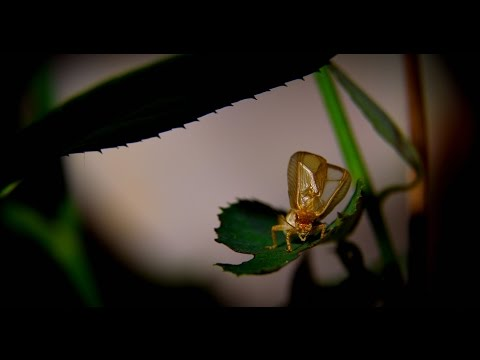

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [ ]:
#@title **Avaliação**
Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 10 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 10 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,5):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,tia,nome,nota
0,10389961,EDUARDO VEIT FERRÃO,10.0
1,10374379,LEONARDO PINHEIRO DE SOUZA,10.0
2,10391076,LUCAS PAULO DA ROCHA,10.0
3,10374379,LUIZ OCTAVIO TASSINARI SARAIVA,10.0
